In [41]:
import numpy
import pandas
import seaborn
from matplotlib import pyplot

In [42]:
data = pandas.read_csv('data.csv')
data = data.loc[:, data.columns != 'Timestamp']
data = data.loc[:, data.columns != 'What gender do you identify as?']
GPA_dictionary = {'3.5 to 4': 3.8, '3 to 3.5': 3.3, '2.5 to 3': 2.8, '2 to 2.5': 2.3, '1.5 to 2': 1.8, '1 to 1.5': 1.3, '0.5 to 1': 0.8, '0 to 0.5': 0.3, 'I do not have a valid GPA yet.': 3.5}
Year_dictionary = {'Freshman': 1, 'Sophomore': 2, 'Junior': 3, 'Senior': 4, 'Graduate Student': 5, 'Graduate': 5, 'Freshmen': 1, 'Sophmore': 2}
YesNo_dictionary = {'Yes': 1, 'No': 0}
data = data.replace({'What is your GPA?': GPA_dictionary, 'Do you have a job?': YesNo_dictionary, 'What year are you?': Year_dictionary})
data = data.replace({'Are you in a relationship?': YesNo_dictionary})
data = data.replace({'What year do you think has been the easiest for you coursework wise?': Year_dictionary, 'What year do you think has been the most difficult for you coursework wise?': Year_dictionary})
data = data.replace({'Do you think you will pursue graduate education?': YesNo_dictionary})
data = data.fillna(0)
data

,How many programming languages do you know?,What is the average number of hours you sleep each night?,What is your GPA?,How many hours per week do you tend to study?,Do you have a job?,What year are you?,How many clubs do you participate in?,How many GDSC events have you attended?,What is your favorite programming language?,How many credit hours are you taking this semester?,How many credit hours do you plan on taking next semester?,Are you in a relationship?,What is your major?,Which type of professor is your favorite?,What is your favorite color?,"When you have free time, do you spend more of it watching TV, playing games, or reading?",What year do you think has been the most difficult for you coursework wise?,What year do you think has been the easiest for you coursework wise?,Do you think you will pursue graduate education?,What other workshops would you like to see?
0,3,8,3.8,20,0,3,2,2.0,Python,15,13.0,1,computer science,"Easy, but you don't learn as much.",blue,Playing Games,2,3.0,0,personal website
1,5,7,3.8,4,1,2,1,3.0,Java,17,17.0,1,CS,"Easy, but you don't learn as much.",Green,Playing Games,2,1.0,0,Portfolio Website
2,3,5,3.5,20,0,1,4,5.0,Java,16,17.0,0,Computer Science,"Hard, but you learn a lot.",Turquoise,Reading,1,1.0,1,Exploring into ML
3,3,7,3.8,25,0,5,1,10.0,Java,9,6.0,1,Computer Science,"Hard, but you learn a lot.",Black,Watching TV,5,5.0,1,0
4,3,7,3.8,40,0,5,2,5.0,Python,9,9.0,0,Computer science,"Hard, but you learn a lot.",Purple,Watching TV,5,5.0,1,0
5,4,5,3.8,5,1,5,2,0.0,Python,9,12.0,1,Computer Science,"Easy, but you don't learn as much.",Blue,Playing Games,5,4.0,1,0
6,5,8,3.8,9,1,5,0,0.0,Python,9,3.0,0,CS,"Hard, but you learn a lot.",Blue,Watching TV,5,5.0,1,0
7,4,5,2.8,5,1,4,4,0.0,Matlab,12,6.0,0,Mechanical engineering,0,Blue,Playing Games,3,4.0,0,0
8,11,6,2.8,7,0,3,2,0.0,0,13,14.0,0,Computer Engineering,"Easy, but you don't learn as much.",Purple,Playing Games,2,1.0,1,0
9,3,8,3.8,3,0,3,0,3.0,Java,16,14.0,0,CE,"Easy, but you don't learn as much.",Red,Playing Games,3,1.0,0,0


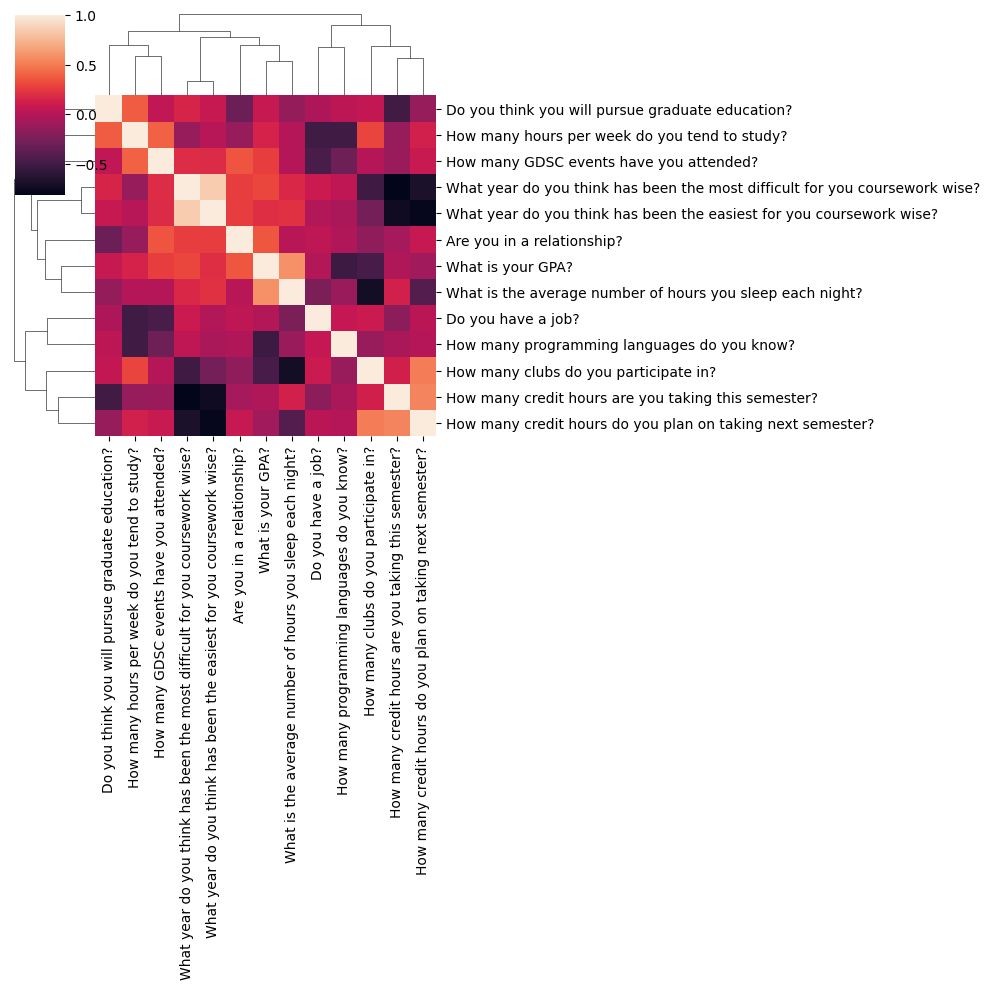

In [43]:
numeric_subdata = data[['Do you think you will pursue graduate education?', 'Are you in a relationship?', 'What year do you think has been the most difficult for you coursework wise?', 'What year do you think has been the easiest for you coursework wise?', 'Do you have a job?', 'What is your GPA?', 'How many credit hours are you taking this semester?', 'How many credit hours do you plan on taking next semester?', 'How many programming languages do you know?', 'What is the average number of hours you sleep each night?', 'How many hours per week do you tend to study?', 'How many clubs do you participate in?', 'How many GDSC events have you attended?']]
seaborn.clustermap(numeric_subdata.corr())

<AxesSubplot: xlabel='How many programming languages do you know?', ylabel='How many GDSC events have you attended?'>

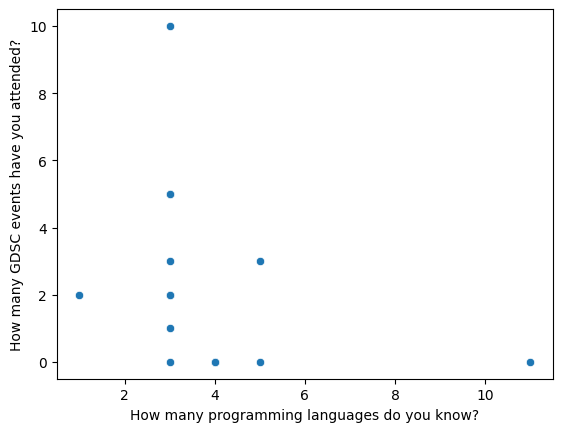

In [44]:
x = data['How many programming languages do you know?']
y = data['How many GDSC events have you attended?']
seaborn.scatterplot(x=x, y=y)

<AxesSubplot: xlabel='Are you in a relationship?', ylabel='How many credit hours are you taking this semester?'>

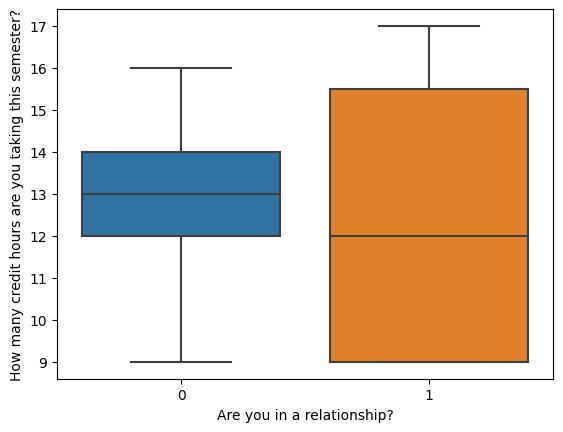

In [45]:
x = data['Are you in a relationship?']
x.map({'Yes': 1, 'No': 0})
y = data['How many credit hours are you taking this semester?']
seaborn.boxplot(x=x, y=y)

<AxesSubplot: xlabel='What is your GPA?', ylabel='Count'>

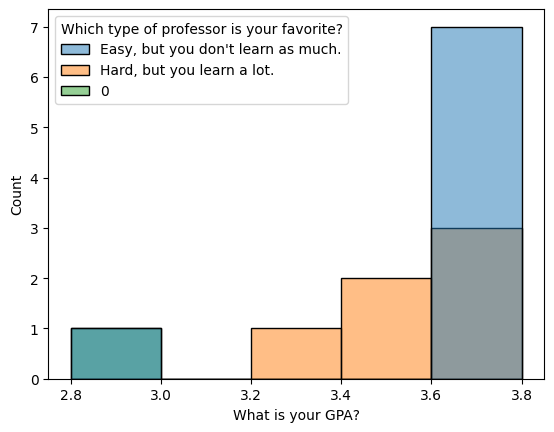

In [46]:
x = data['What is your GPA?']
seaborn.histplot(x=x, hue=data['Which type of professor is your favorite?'])

<AxesSubplot: xlabel='How many GDSC events have you attended?', ylabel='How many programming languages do you know?'>

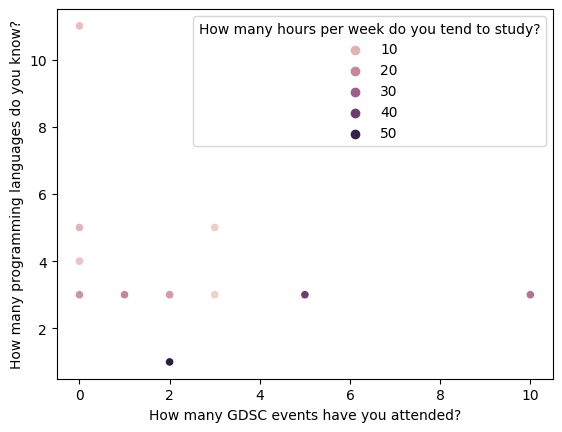

In [47]:
x = data['How many GDSC events have you attended?']
y = data['How many programming languages do you know?']
hue = data['How many hours per week do you tend to study?']
seaborn.scatterplot(x=x, y=y, hue=hue)